# MNIST Example

In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata('MNIST original')

In [3]:
X, y = mnist["data"], mnist["target"]
print X.shape
print y.shape

(70000, 784)
(70000,)


In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def PDigit(d):
    some_digit_image = d.reshape(28, 28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
    plt.axis("off")
    plt.show()
    
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

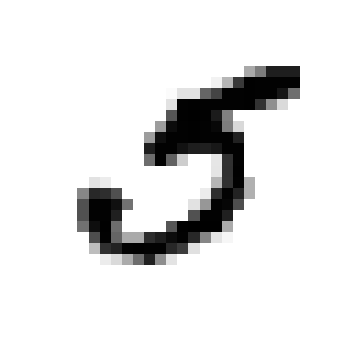

5.0


In [6]:
some_digit = X[36000]
PDigit(some_digit)
print y[36000]

In [25]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

print X_train.shape
print X_test.shape

(60000, 784)
(10000, 784)


In [8]:
y_train_5 = (y_train == 5)  # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)
print y_train_5.shape

(60000,)

In [9]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print d

154


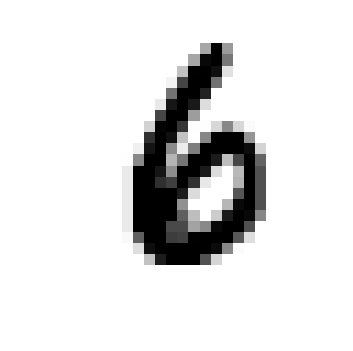

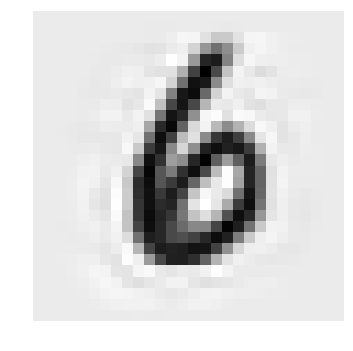

In [10]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

PDigit(X_train[1])
PDigit(X_recovered[1])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

PDigit(X_train[1])
PDigit(X_recovered[1])

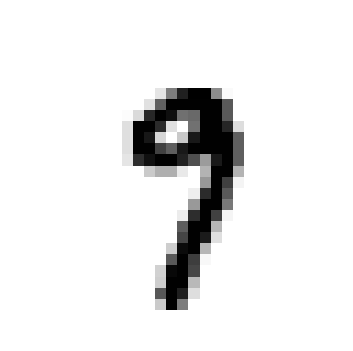

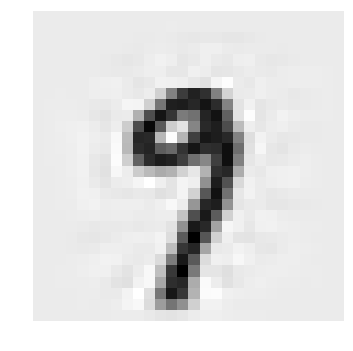

In [11]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)
X_recovered = inc_pca.inverse_transform(X_reduced)

PDigit(X_train[1])
PDigit(X_recovered[1])

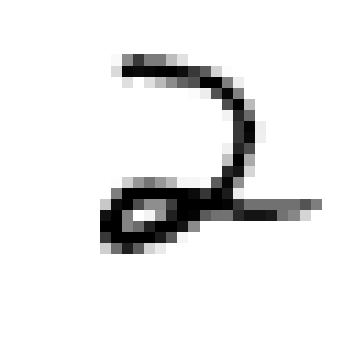

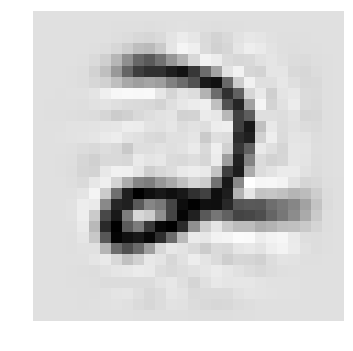

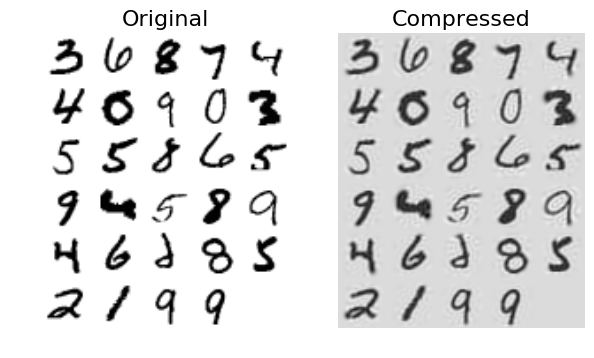

In [10]:
from sklearn.decomposition import PCA
rnd_pca = PCA(n_components=154, svd_solver='randomized')
X_reduced = rnd_pca.fit_transform(X_train)
X_recovered =rnd_pca.inverse_transform(X_reduced)

PDigit(X_train[1])
PDigit(X_recovered[1])

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()

0.949811513083


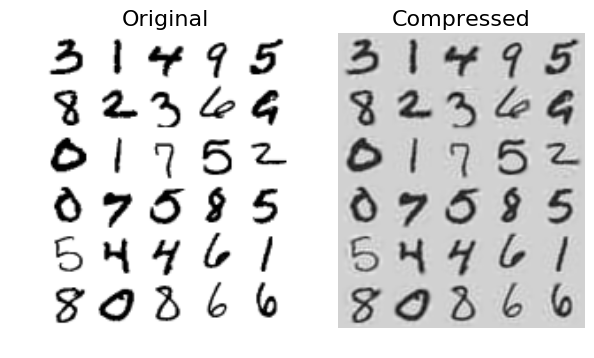

In [11]:
print sum(rnd_pca.explained_variance_ratio_)
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2000])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2000])
plt.title("Compressed", fontsize=16)
plt.show()

In [12]:
np.random.seed(42)
rnd_idx = np.random.permutation(60000)
X_t = X_reduced[rnd_idx]
y_t = y_train[rnd_idx]

In [13]:
from sklearn.svm import SVC, LinearSVC

lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_t, y_t)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [14]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_t)
accuracy_score(y_t, y_pred)

0.82146666666666668

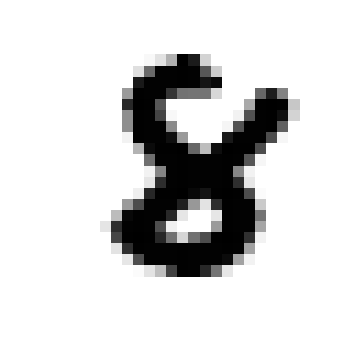

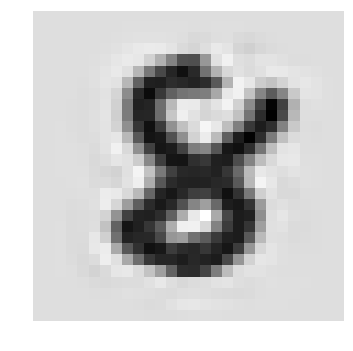

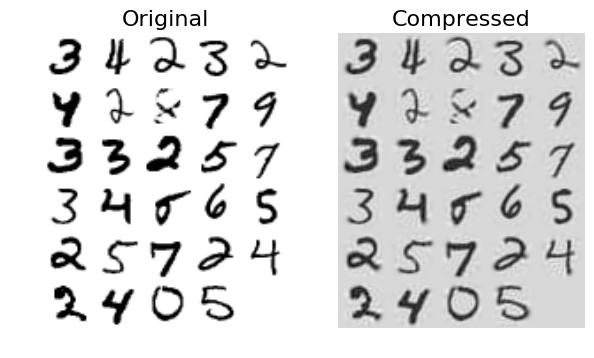

In [26]:
from sklearn.preprocessing import StandardScaler

rnd_pca = PCA(n_components=154, svd_solver='randomized')
X_reduced = rnd_pca.fit_transform(X_train)
X_recovered =rnd_pca.inverse_transform(X_reduced)

PDigit(X_train[1])
PDigit(X_recovered[1])

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()

In [22]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_reduced, y_t)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [24]:
y_pred = lin_clf.predict(X_reduced)
accuracy_score(y_train, y_pred)

0.10111666666666666